In [1]:
import numpy as np
from astropy.io import fits

In [8]:
import matplotlib.pyplot as plt

In [2]:
hdul_r = fits.open('../primary_beam_mh_1227MHz_10deg_re.fits')
hdul_i = fits.open('../primary_beam_mh_1227MHz_10deg_im.fits')

In [4]:
hdul_r[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    5 / number of array dimensions                     
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
NAXIS3  =                    2                                                  
NAXIS4  =                    2                                                  
NAXIS5  =                    1                                                  
CTYPE1  = 'py      '                                                            
CRPIX1  =                256.0                                                  
CRVAL1  =                  0.0                                                  
CDELT1  =           0.01953125                                                  
CUNIT1  = 'deg     '        

In [41]:
beam_h = hdul_r[0].data[0,0,0] + 1.j*hdul_i[0].data[0,0,0]

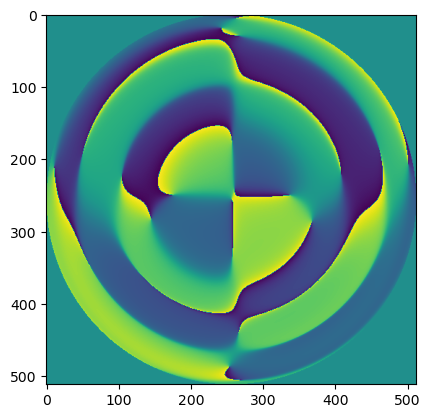

In [29]:
plt.imshow(np.angle(beam_h))

/var/folders/16/sk2dht895n34bdl4v2y8hw700000gn/T/ipykernel_64339/670478262.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(beam_h)))


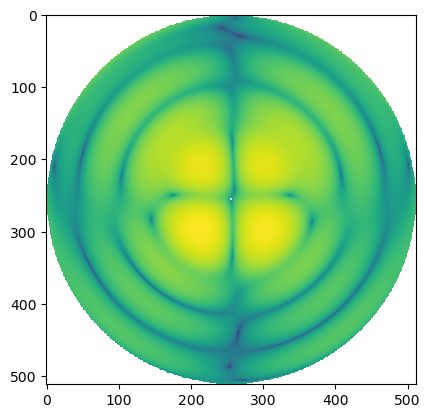

In [30]:
plt.imshow(np.log10(np.abs(beam_h)))

/var/folders/16/sk2dht895n34bdl4v2y8hw700000gn/T/ipykernel_64339/1240377692.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(deg, 1000+200*np.log10(np.abs(beam_h[256])))


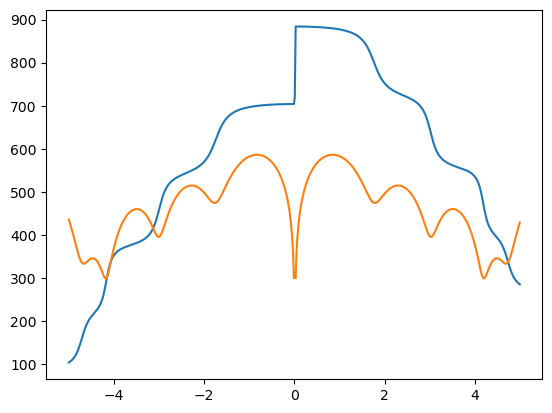

In [36]:
deg = np.linspace(-5, 5, len(beam_h))
plt.plot(deg, np.rad2deg(np.unwrap(np.angle(beam_h[256]))))
# plt.plot(deg, np.rad2deg(np.unwrap(2*np.arctan(beam_h[256].imag/beam_h[256].real))))
plt.plot(deg, 1000+200*np.log10(np.abs(beam_h[256])))

(-200.0, 200.0)

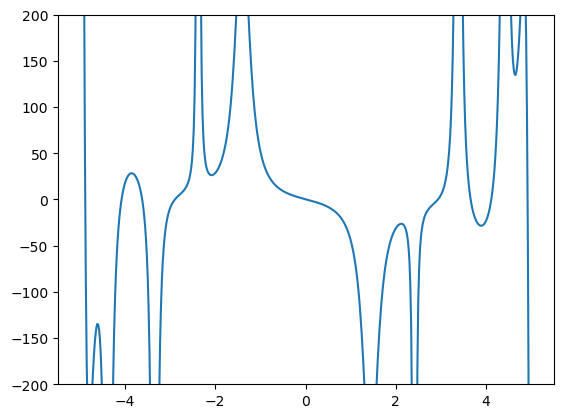

In [42]:
plt.plot(deg[1:], np.diff(np.rad2deg(np.unwrap(np.angle(beam_h[256]))))/np.diff(deg))
plt.ylim(-200, 200)